In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:09<00:00, 53.2MB/s]
100% 1.06G/1.06G [00:09<00:00, 124MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [8]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [10]:
#creating CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))




In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 101ms/step - loss: 1.2493 - accuracy: 0.6011 - val_loss: 0.5667 - val_accuracy: 0.7124
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5495 - accuracy: 0.7220 - val_loss: 0.5068 - val_accuracy: 0.7498
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4653 - accuracy: 0.7859 - val_loss: 0.5465 - val_accuracy: 0.7300
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4018 - accuracy: 0.8156 - val_loss: 0.4639 - val_accuracy: 0.7708
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3342 - accuracy: 0.8514 - val_loss: 0.6098 - val_accuracy: 0.7370
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2520 - accuracy: 0.8928 - val_loss: 0.5156 - val_accuracy: 0.7896
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1828 - accuracy: 0.9300 - val_loss: 0.7041 - val_ac

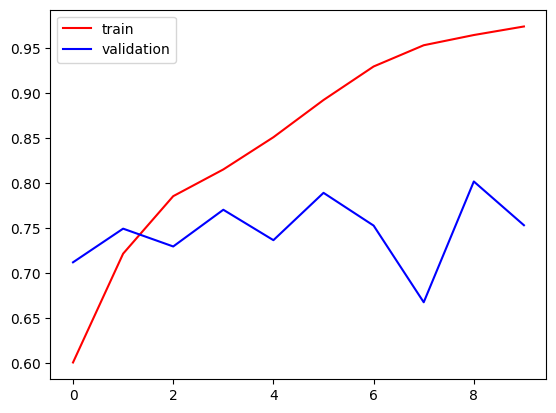

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



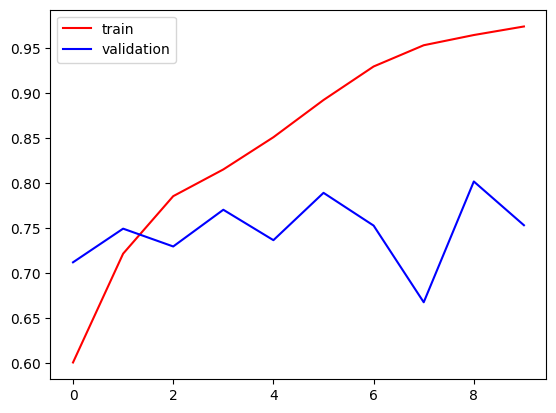

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

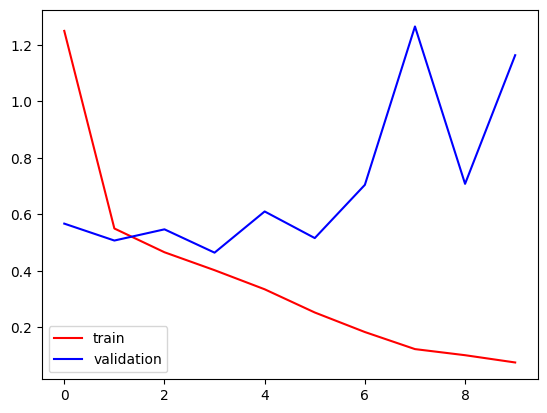

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [54]:
#need to reduce complexity
#add more data
#reducing complexity
import cv2
import numpy as np

In [48]:
test_image = cv2.imread('/content/cat/jpg')

TypeError: Image data of dtype object cannot be converted to float

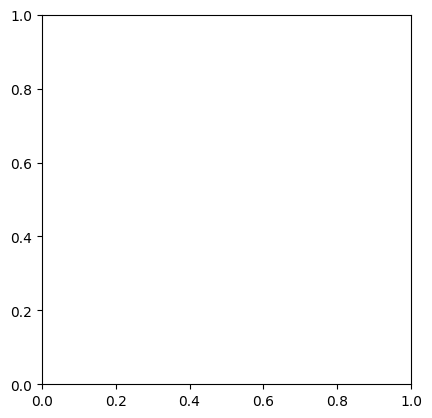

In [55]:
plt.imshow(test_image)

In [63]:
from PIL import Image
import numpy as np

image_path = 'cat.jpg'
test_image = cv2.imread(Image.open(image_path))

# Resize the image to (256, 256)
test_image_resized = np.array(Image.fromarray(test_image).resize((256, 256)))

# Now you can reshape
test_input = test_image_resized.reshape(1, 256, 256, 3)


TypeError: Can't convert object to 'str' for 'filename'

In [64]:
model.predict(image_path)

IndexError: tuple index out of range